In [1]:
import polars as pl
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
File = pd.read_csv("dataset.csv")
File = File.drop(File.columns[0], axis=1)
File = File.drop(File.columns[2], axis=1) #Enlever la description car ca devient le seul critere de l'arbre
x_features = File.columns.delete(1)
x_features

Index(['community_area', 'Arrest', 'Domestic', 'location_description',
       'Comm_Area', 'Hardship_Score', 'Crowded_Housing_Per',
       'Below_Poverty_Household_Income', 'Unemployment_Rate',
       'No_High_School_Diploma', 'Under_18_over_64', 'Per_Capita_Income'],
      dtype='object')

In [3]:
Data = File.to_numpy()

In [4]:
primary = LabelEncoder()
location = LabelEncoder()
date = LabelEncoder()
comm_area = LabelEncoder()


Data[:,1] = primary.fit_transform(Data[:,1])
Data[:,4] = location.fit_transform(Data[:,4])
Data[:,5] = date.fit_transform(Data[:,5])
Data[:,6] = comm_area.fit_transform(Data[:,6])

Data

array([[63, 2, False, ..., 22.4, 39.0, 13605.0],
       [63, 2, False, ..., 22.4, 39.0, 13605.0],
       [30, 2, False, ..., 28.8, 35.3, 11345.0],
       ...,
       [48, 3, False, ..., 8.1, 37.8, 27488.0],
       [44, 5, False, ..., 8.0, 37.9, 21416.0],
       [42, 3, False, ..., 8.2, 36.7, 19117.0]], dtype=object)

In [5]:
x = np.delete(Data, obj=1, axis=1)
y = Data[:,1]
y = y.astype('int')
print(y)
print(np.unique(y, axis=0))

[2 2 2 ... 3 5 3]
[0 1 2 3 4 5]


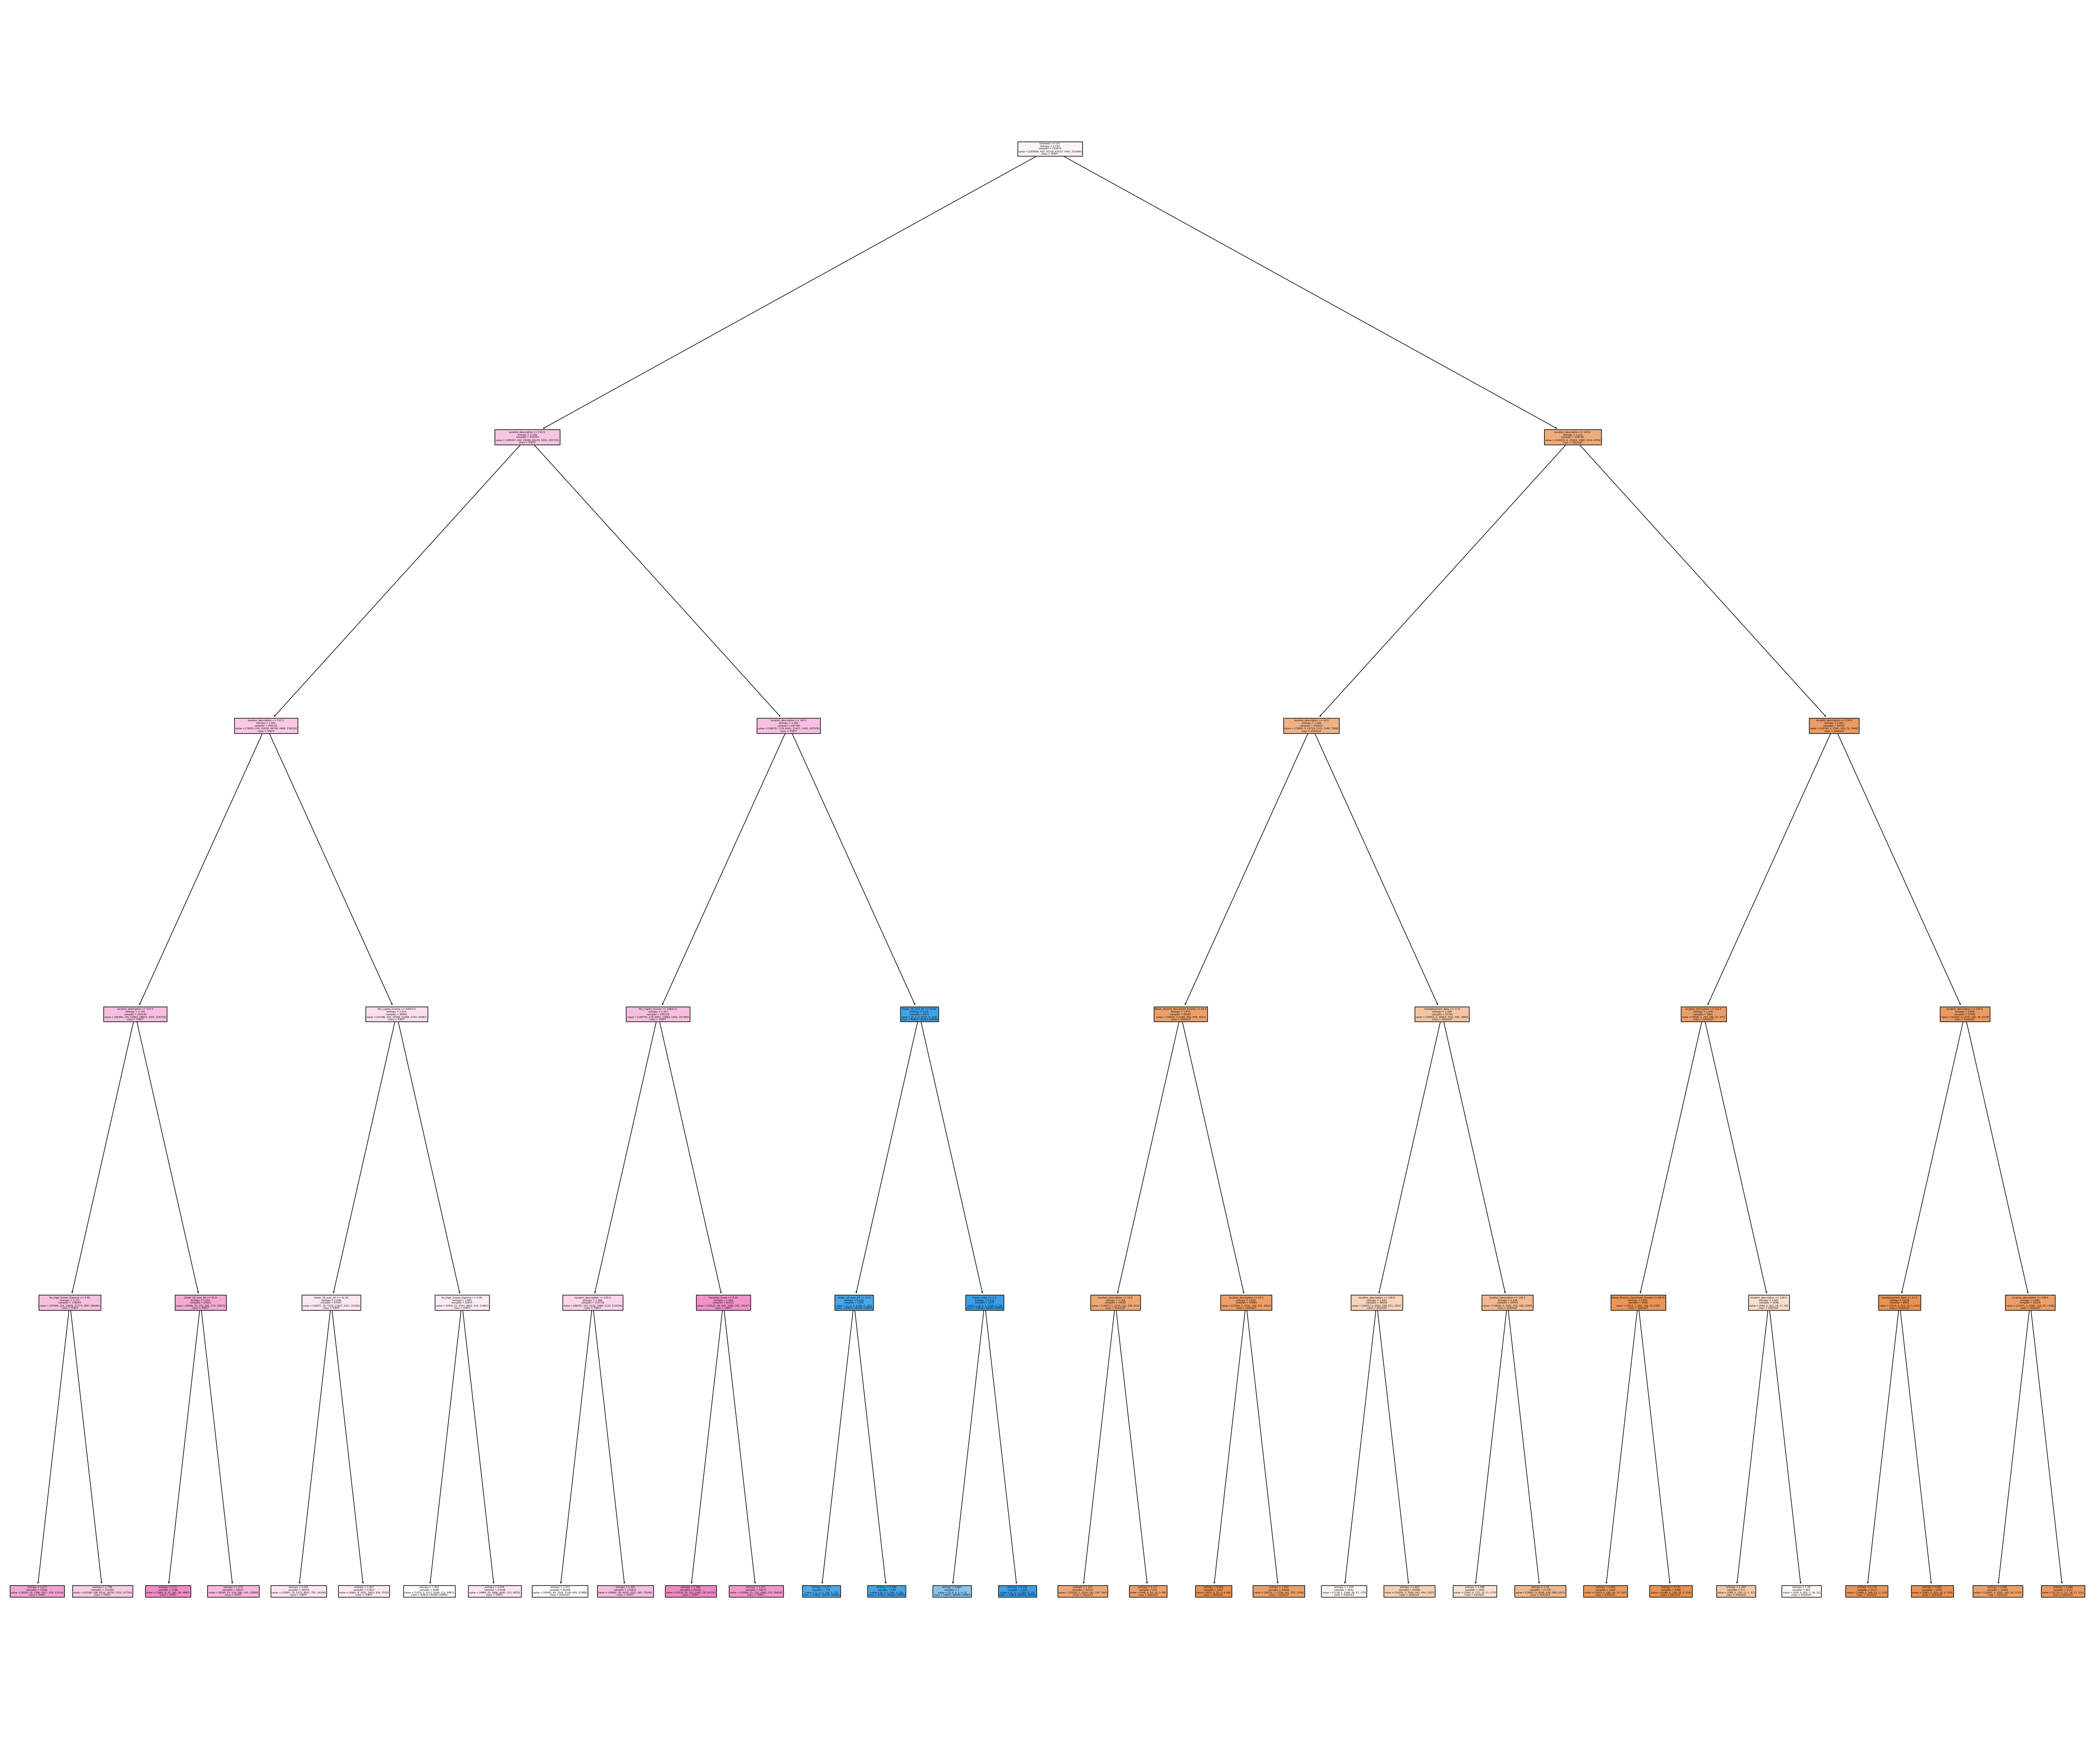


***** Learning performances: *****
Confusion Matrix: 
[[140217      0      0   1079      0 144663]
 [    71      0      0      2      0    357]
 [ 27424      0      0   1021      0  26873]
 [  5036      0      0   5636      0  56365]
 [  2155      0      0    112      0   5174]
 [ 47743      0      0   3107      0 264640]]
Accuracy :  56.10318789079851

***** Prediction performances: *****
Confusion Matrix: 
[[ 60451      0      0    458      0  61544]
 [    31      0      0      1      0    140]
 [ 11768      0      0    430      0  11365]
 [  2104      0      0   2368      0  24332]
 [   917      0      0     51      0   2228]
 [ 20301      0      0   1298      0 113789]]
Accuracy :  56.320636783427304


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

# Creating the classifier object 
#clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=1).fit(X_train, y_train) 
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1).fit(X_train, y_train)

crime_names = list(primary.classes_)
features = list(x_features)

plt.figure(figsize=(60, 50))
tree.plot_tree(clf, class_names=crime_names, feature_names = features, filled=True)
plt.show()

print("\n***** Learning performances: *****") 
# make predictions
y_valid = clf.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = clf.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

In [8]:
#### Random Forests

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

# Learn the classifier
RdmF = RandomForestClassifier(n_estimators=100, criterion = "entropy", max_depth=8).fit(X_train, y_train);

print("\n***** Learning performances: *****") 
# make predictions
y_valid = RdmF.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = RdmF.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 


***** Learning performances: *****
Confusion Matrix: 
[[111890      0    120    247      0 174127]
 [    42      0      3      1      0    381]
 [ 26400      0   1026    301      0  27436]
 [  2507      0     44   3980      0  60223]
 [  1671      0     11     49      0   5682]
 [ 17035      0    256    926      0 297317]]
Accuracy :  56.61161034612362

***** Prediction performances: *****
Confusion Matrix: 
[[ 47699      0     52    110      0  74167]
 [    14      0      2      0      0    159]
 [ 11206      0    428    130      0  11954]
 [  1128      0     16   1621      0  26322]
 [   710      0      6     14      0   2494]
 [  7386      0    121    401      0 127436]]
Accuracy :  56.504324310533974
